In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import MinMaxScaler, PowerTransformer
from sklearn.model_selection import train_test_split, cross_val_score
import joblib
import warnings
warnings.filterwarnings('ignore')

In [4]:
ds=pd.read_csv('abalone.csv')

In [5]:
ds

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [6]:
ds.shape

(4177, 9)

## Dataset has 9 variable, 
Length, Diameter, Height,Whole weight, Shucked weight, Viscera weight, Shell weight, Rings are independent variable.
Sex is the dependent Veriable.

In [7]:
ds.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

Target Veriable is string type veriable, while Rings are Integer type, all other veriables are float.

In [8]:
pd.set_option('display.max_row',None)

In [9]:
# Check if data has any non numeric value

ds.applymap(lambda x: isinstance(x, str))

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,True,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False
5,True,False,False,False,False,False,False,False,False
6,True,False,False,False,False,False,False,False,False
7,True,False,False,False,False,False,False,False,False
8,True,False,False,False,False,False,False,False,False
9,True,False,False,False,False,False,False,False,False


## All independent veriable has numeric verlus only, 

means there is no special charectors in data set(?,$,%,#) exist in dataset.

In [10]:
ds.info

<bound method DataFrame.info of      Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
0      M   0.455     0.365   0.095        0.5140          0.2245   
1      M   0.350     0.265   0.090        0.2255          0.0995   
2      F   0.530     0.420   0.135        0.6770          0.2565   
3      M   0.440     0.365   0.125        0.5160          0.2155   
4      I   0.330     0.255   0.080        0.2050          0.0895   
5      I   0.425     0.300   0.095        0.3515          0.1410   
6      F   0.530     0.415   0.150        0.7775          0.2370   
7      F   0.545     0.425   0.125        0.7680          0.2940   
8      M   0.475     0.370   0.125        0.5095          0.2165   
9      F   0.550     0.440   0.150        0.8945          0.3145   
10     F   0.525     0.380   0.140        0.6065          0.1940   
11     M   0.430     0.350   0.110        0.4060          0.1675   
12     M   0.490     0.380   0.135        0.5415          0.2175   
13     F   0.535

In [11]:
ds.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

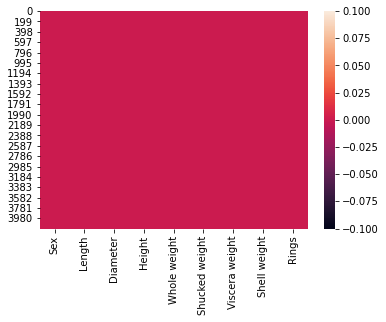

In [12]:
sns.heatmap(ds.isnull())
plt.show()

## Null value not present in dataset

In [13]:
ds.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


# Obsarvation:-
1. count of all the veriable are same, it indicate that dataset has no missing value.
2. Mean and Median for all columns are almost equal(minor difference ), means data set has very little skewness.
3. Not found very huge difference in mean and Max value , it means there could be very less outlier, will check outlier in next action for individual columns 
4. No Negative value exist in columns

<AxesSubplot:xlabel='Sex', ylabel='count'>

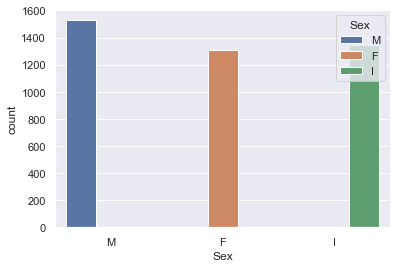

In [14]:
sns.set_theme(style="darkgrid")
sns.countplot(x='Sex', hue='Sex', data=ds)

In [ ]:
sns.set_theme(style="darkgrid")
sns.countplot(x='', hue='Sex', data=ds)

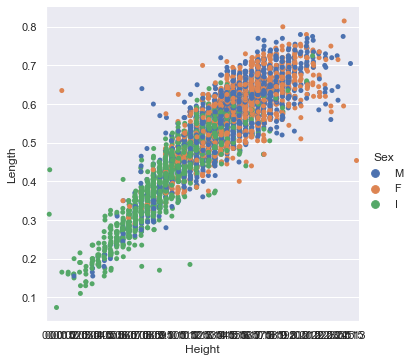

In [15]:
sns.catplot( x='Height', y="Length", hue="Sex",
             edgecolor="0.1",
            data=ds)

Height and Length has positive correlation, simier relation visible for multiple columns where if one value increases then another value also increase.


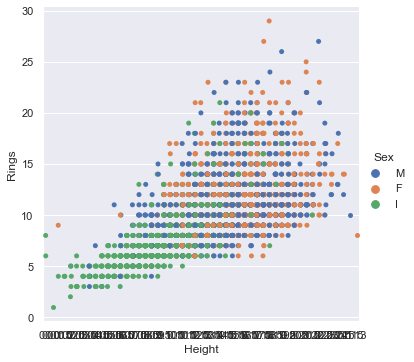

In [20]:
sns.catplot( x='Height', y="Rings", hue="Sex",
             edgecolor="0.1",
            data=ds)

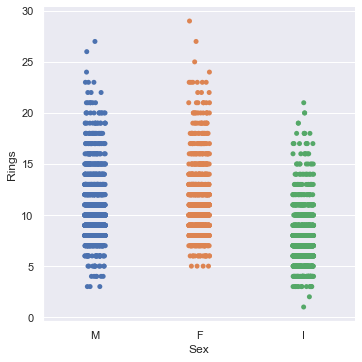

In [23]:
sns.catplot( x='Sex', y="Rings", hue="Sex",
             edgecolor="0.1",
            data=ds)

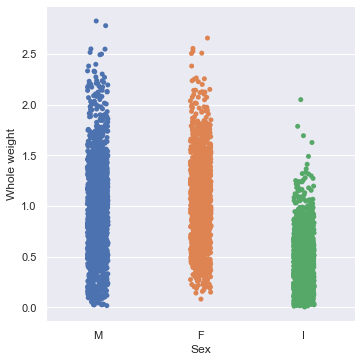

In [24]:
sns.catplot( x='Sex', y="Whole weight", hue="Sex",
             edgecolor="0.1",
            data=ds)

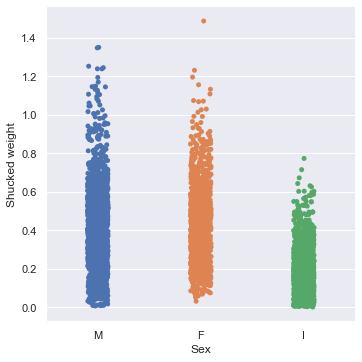

In [25]:
sns.catplot( x='Sex', y="Shucked weight", hue="Sex",
             edgecolor="0.1",
            data=ds)

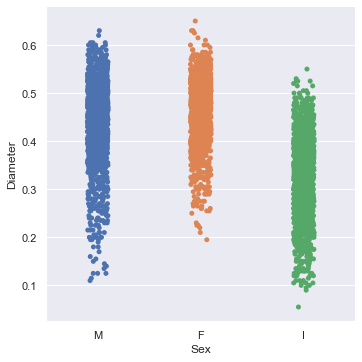

In [27]:
sns.catplot( x='Sex', y="Diameter", hue="Sex",
             edgecolor="0.1",
            data=ds)

In [ ]:
sns.catplot( x='Sex', y="Viscera weight", hue="Sex",
             edgecolor="0.1",
            data=ds)

Female ablone do not have rings less then 5.


## Data is balanced.

In [32]:
# Encode Sex column in numerical values.
from sklearn.preprocessing import LabelEncoder
label_quality = LabelEncoder()
ds['Sex'] = label_quality.fit_transform(ds['Sex'])
ds['Sex'].value_counts()

2    1528
1    1342
0    1307
Name: Sex, dtype: int64

In [33]:
ds.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


<function matplotlib.pyplot.show(close=None, block=None)>

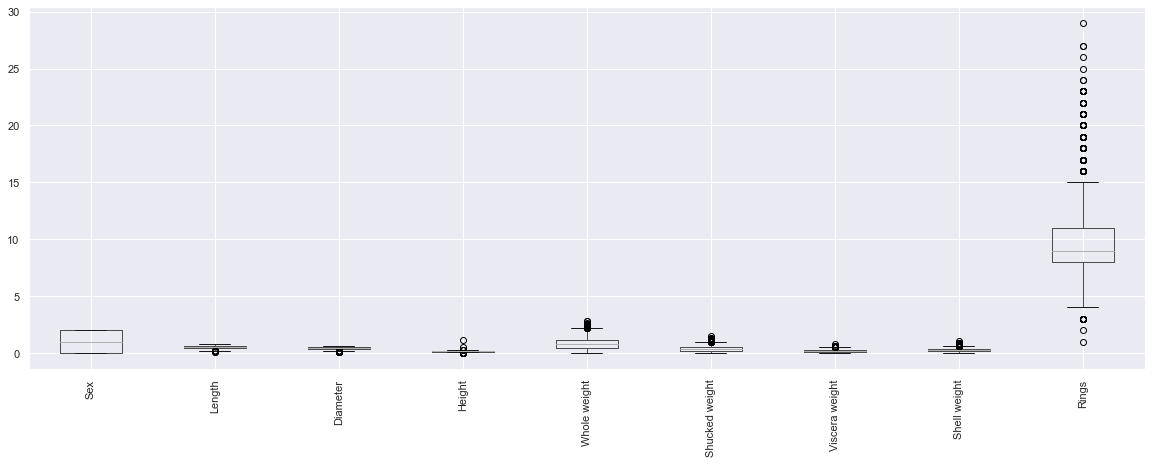

In [35]:
ds.boxplot(figsize=[20,8])
plt.xticks(rotation = 90)
plt.subplots_adjust(bottom=0.25)
plt.show

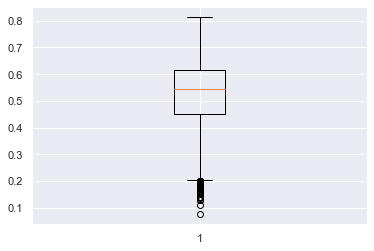

In [38]:
plt.boxplot(ds['Length'])
plt.show()

#### Outlier exist but very near to whiscor , hence not removing them.

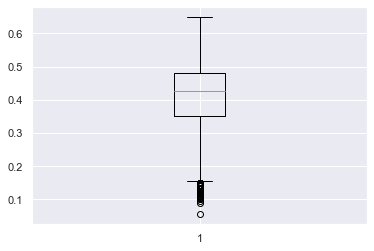

In [39]:
plt.boxplot(ds['Diameter'])
plt.show()

#### Outlier exist but very near to whiscor , hence not removing them.

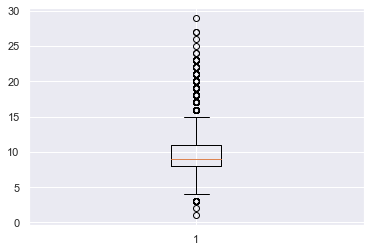

In [40]:
plt.boxplot(ds['Rings'])
plt.show()

### outlier for this column need to remove.

In [41]:
def outlier_IQR(data_frame, feature_name):
  IQR = data_frame[feature_name].quantile(0.75)-data_frame[feature_name].quantile(0.25)
  lower_bridge = data_frame[feature_name].quantile(0.25) -(IQR*3)
  upper_bridge = data_frame[feature_name].quantile(0.75) + (IQR*3)
  return (lower_bridge,upper_bridge)

In [42]:
l,u = outlier_IQR(ds, 'Rings')
ds.drop(ds[ (ds['Rings'] > u) | (ds['Rings'] < l) ].index, inplace=True)

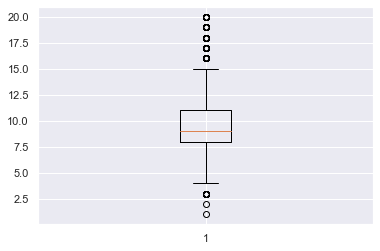

In [43]:
plt.boxplot(ds['Rings'])
plt.show()

### Outlier for Veriable Rings has been removed.

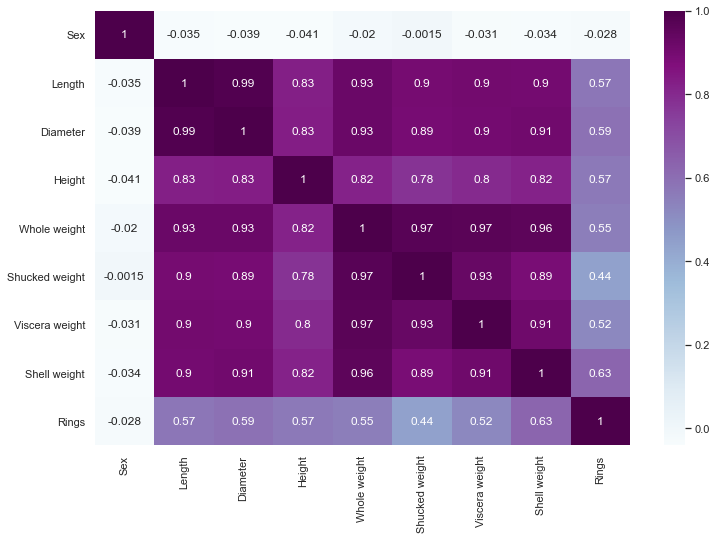

In [46]:
#Check for corelation.
fig=plt.figure(figsize=(12,8))
hc=ds.corr()
sns.heatmap(hc,annot=True,cmap="BuPu")
plt.show()

In [47]:
corr_matrix = ds.corr()
corr_matrix['Sex'].sort_values(ascending=False)

Sex               1.000000
Shucked weight   -0.001469
Whole weight     -0.019996
Rings            -0.028403
Viscera weight   -0.031136
Shell weight     -0.033636
Length           -0.035455
Diameter         -0.038730
Height           -0.040896
Name: Sex, dtype: float64

### All values are negativly correlated with Sex.

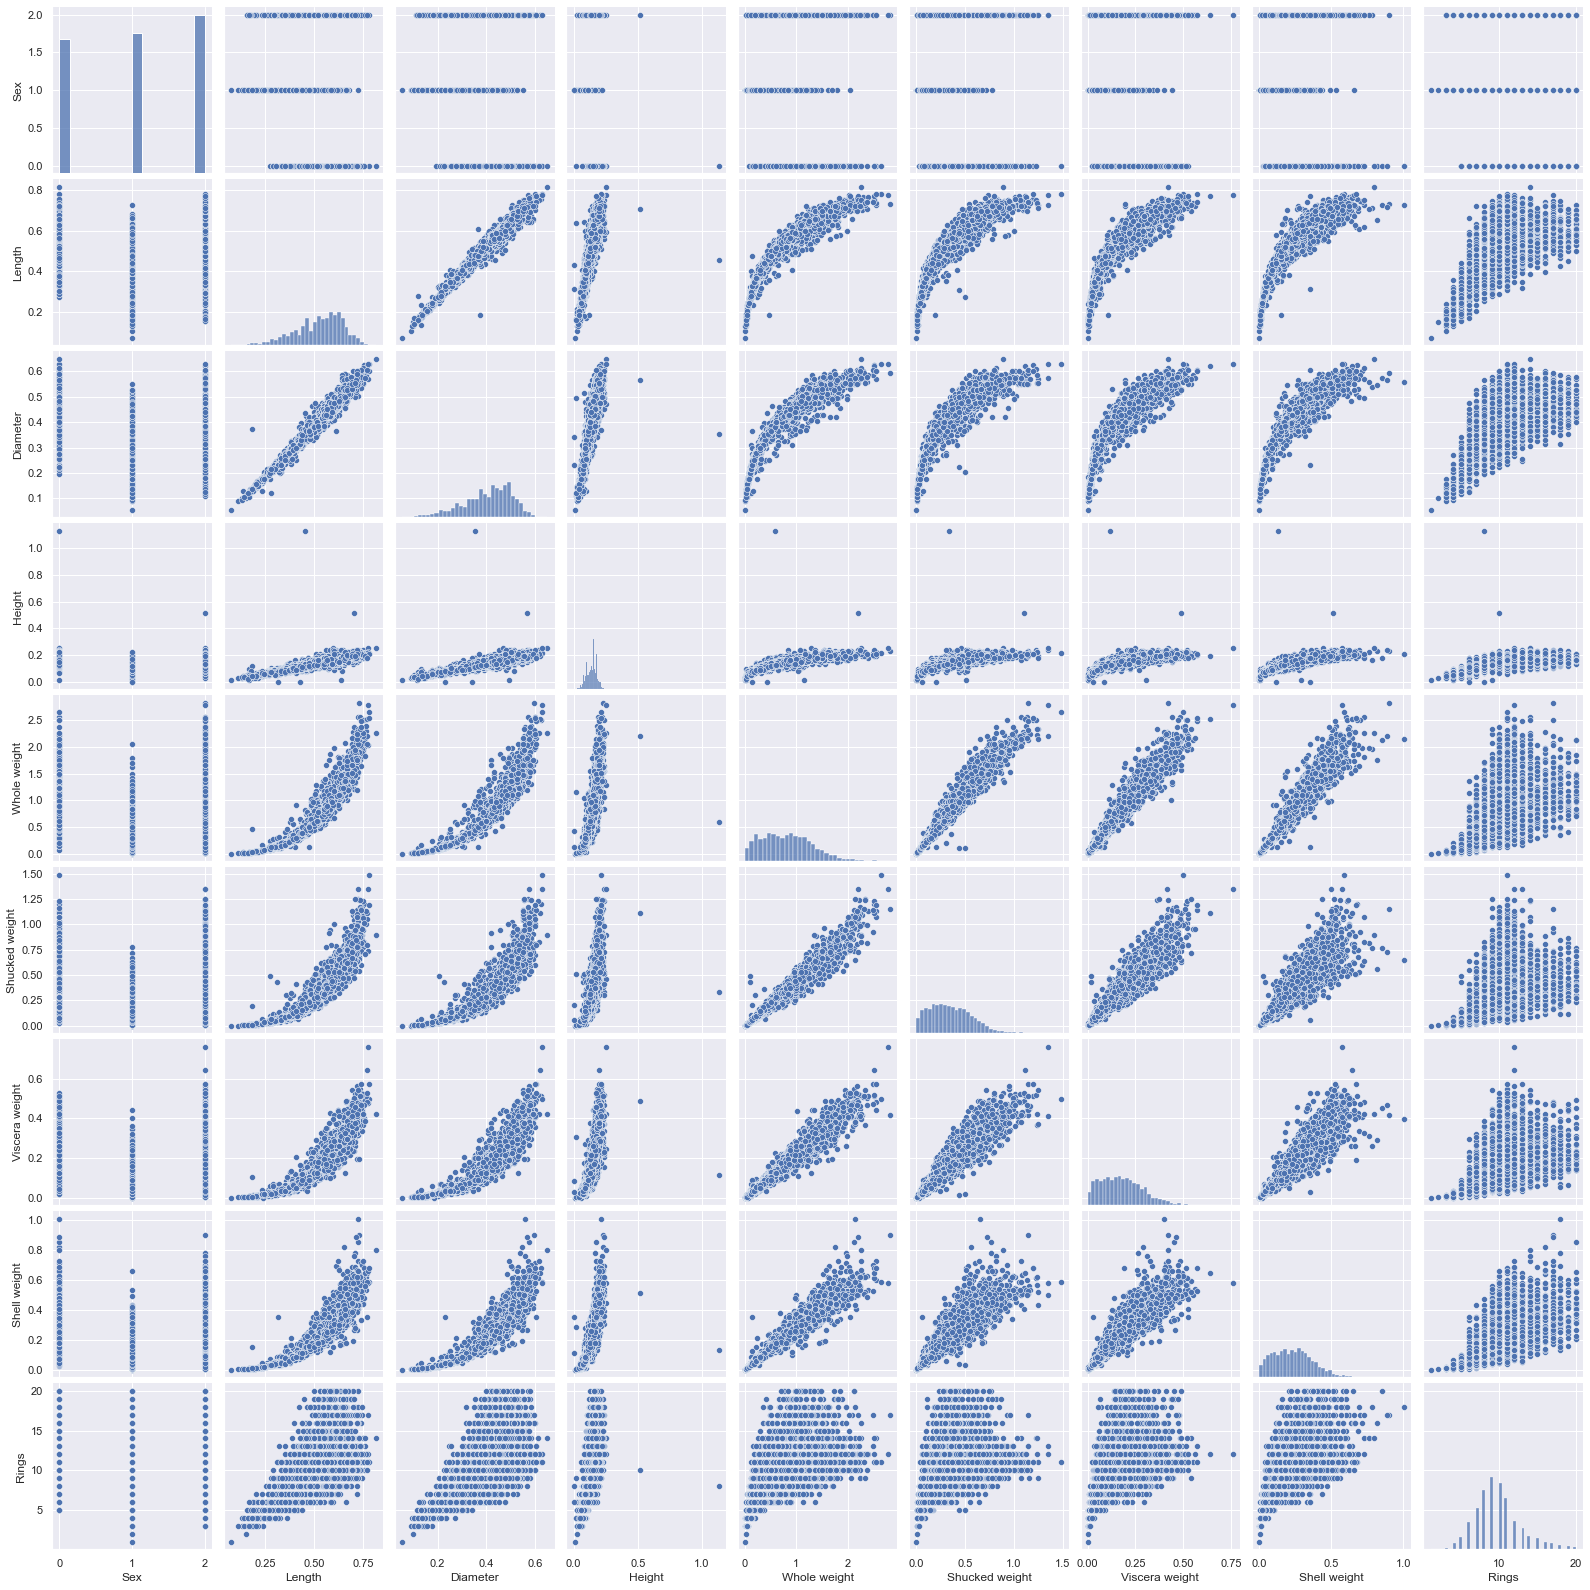

In [48]:
sns.pairplot(ds)

In [47]:
x = ds.drop(columns=["Sex"])
y = ds['Sex']

In [48]:
x.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [49]:
x.shape

(4177, 8)

In [50]:
y.shape

(4177,)

In [51]:
x.skew()

Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
dtype: float64

<AxesSubplot:xlabel='Height', ylabel='Count'>

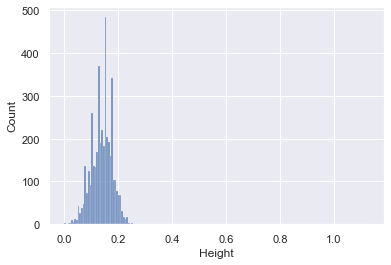

In [57]:
sns.histplot(x['Height'])

<AxesSubplot:xlabel='Rings', ylabel='Count'>

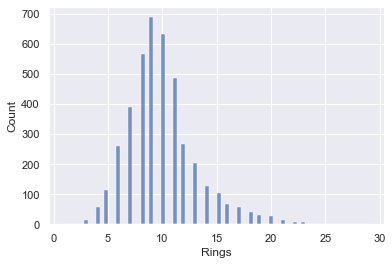

In [53]:
sns.histplot(x['Rings'])

## Skewness exist for Height and Rings variable, other veriable has some skewness but it is very less. we will use zscore method to remove skewness

In [58]:
from sklearn.preprocessing import PowerTransformer
power = PowerTransformer(method='yeo-johnson', standardize=True)
data_trans = power.fit_transform(x)
x = pd.DataFrame(data_trans, columns = x.columns)


In [59]:
x.skew()

Length           -0.066669
Diameter         -0.065977
Height           -0.115483
Whole weight     -0.003980
Shucked weight    0.027351
Viscera weight    0.039780
Shell weight      0.023390
Rings             0.004429
dtype: float64

## Skewness removed now

In [107]:
from sklearn.linear_model import LogisticRegression
maxAccu = 0
maxRS = 0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.42,random_state=i)
    rf=RandomForestClassifier(n_estimators=30)
    rf.fit(x_train,y_train)
    predrf = rf.predict(x_test)
    acc = accuracy_score(y_test,predrf)
    if acc >maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is", maxAccu, "on Random_state",maxRS)

Best accuracy is 0.5692307692307692 on Random_state 51


In [123]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.42,random_state=51)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2422, 8)
(1755, 8)
(2422,)
(1755,)


In [125]:
gnb = GaussianNB()
gnb.fit(x_train,y_train)
pred = gnb.predict(x_test)
print("accuracy_score:",)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy_score:
0.5276353276353276
[[382 103  66]
 [ 63 459  56]
 [397 144  85]]
              precision    recall  f1-score   support

           F       0.45      0.69      0.55       551
           I       0.65      0.79      0.71       578
           M       0.41      0.14      0.20       626

    accuracy                           0.53      1755
   macro avg       0.50      0.54      0.49      1755
weighted avg       0.50      0.53      0.48      1755



In [126]:
sv = SVC(kernel="rbf")
sv.fit(x_train,y_train)
pred = sv.predict(x_test)
print("accuracy_score:",)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy_score:
0.5692307692307692
[[146  85 320]
 [ 22 463  93]
 [112 124 390]]
              precision    recall  f1-score   support

           F       0.52      0.26      0.35       551
           I       0.69      0.80      0.74       578
           M       0.49      0.62      0.55       626

    accuracy                           0.57      1755
   macro avg       0.57      0.56      0.55      1755
weighted avg       0.56      0.57      0.55      1755



In [127]:
rf=RandomForestClassifier(n_estimators=30)
rf.fit(x_train,y_train)
pred = rf.predict(x_test)
print("accuracy_score:",)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy_score:
0.5669515669515669
[[234  63 254]
 [ 51 438  89]
 [205  98 323]]
              precision    recall  f1-score   support

           F       0.48      0.42      0.45       551
           I       0.73      0.76      0.74       578
           M       0.48      0.52      0.50       626

    accuracy                           0.57      1755
   macro avg       0.56      0.57      0.56      1755
weighted avg       0.56      0.57      0.56      1755



In [128]:
ad=AdaBoostClassifier(n_estimators=100)
ad.fit(x_train,y_train)
pred = ad.predict(x_test)
print("accuracy_score:",)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy_score:
0.5373219373219373
[[187  92 272]
 [ 43 459  76]
 [195 134 297]]
              precision    recall  f1-score   support

           F       0.44      0.34      0.38       551
           I       0.67      0.79      0.73       578
           M       0.46      0.47      0.47       626

    accuracy                           0.54      1755
   macro avg       0.52      0.54      0.53      1755
weighted avg       0.52      0.54      0.53      1755



In [129]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
predknn = knn.predict(x_test)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

0.5344729344729344
[[259  84 208]
 [ 99 425  54]
 [264 108 254]]
              precision    recall  f1-score   support

           F       0.42      0.47      0.44       551
           I       0.69      0.74      0.71       578
           M       0.49      0.41      0.44       626

    accuracy                           0.53      1755
   macro avg       0.53      0.54      0.53      1755
weighted avg       0.53      0.53      0.53      1755



In [130]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt = dt.predict(x_test)
print(accuracy_score(y_test,preddt))
print(confusion_matrix(y_test,preddt))   
print(classification_report(y_test,preddt))

0.4757834757834758
[[214  88 249]
 [ 98 345 135]
 [237 113 276]]
              precision    recall  f1-score   support

           F       0.39      0.39      0.39       551
           I       0.63      0.60      0.61       578
           M       0.42      0.44      0.43       626

    accuracy                           0.48      1755
   macro avg       0.48      0.48      0.48      1755
weighted avg       0.48      0.48      0.48      1755



# Cross Validation of predicted and actual value


In [131]:
#Logistic Regression
score=cross_val_score(lg,x,y,cv=5)
#print(score)
print(score.mean())

0.5585368019940979


In [132]:
#Cross Validation for GNB 
score=cross_val_score(gnb,x,y,cv=5)
#print(score)
print(score.mean())

0.5152009855886313


In [133]:
#Cross Validation for Support Vactor
score=cross_val_score(sv,x,y,cv=5)
#print(score)
print(score.mean())

0.5580557545196688


In [134]:
#Cross Validation for Random Forest
score=cross_val_score(rf,x,y,cv=5)
#print(score)
print(score.mean())

0.5343592241354612


In [135]:
#Cross Validation for KNN
score=cross_val_score(knn,x,y,cv=5)
#print(score)
print(score.mean())

0.5125676875913244


In [136]:
#Cross validation for Ada boost
score=cross_val_score(ad,x,y,cv=5)
#print(score)
print(score.mean())

0.5243059335873707


# Hyper Parameter Tuning for different model

In [137]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from pprint import pprint
from sklearn.ensemble import RandomForestRegressor
#Apply Random SearchCV for Random Forest Model
parameters = {"n_estimators":[100,200,300,400,500,600,700,800], 'criterion' : ['gini', 'entropy'],
              "max_depth":[3,4,5,6,7,8,10,25],"min_samples_split":[2,5,8,10,12,18]
            ,"max_features":['auto', 'sqrt'],"min_samples_leaf":[1,3,5,6,7] }

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = parameters, n_iter = 100, cv = 8, verbose=2, n_jobs = -1)
#GCV =GridSearchCV(rf,parameters,cv=5) 
# Fit the random search model

result=rf_random.fit(x_train, y_train)
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Fitting 8 folds for each of 100 candidates, totalling 800 fits
Best Score: 0.5590603348414311
Best Hyperparameters: {'n_estimators': 700, 'min_samples_split': 2, 'min_samples_leaf': 6, 'max_features': 'auto', 'max_depth': 7, 'criterion': 'gini'}


In [140]:
#Apply Random SearchCV for SVC Model
parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = SVC()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = parameters, n_iter = 50, cv = 8, verbose=2, n_jobs = -1)
# Fit the random search model

result=rf_random.fit(x_train, y_train)
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Fitting 8 folds for each of 36 candidates, totalling 288 fits
Best Score: 0.5615287522129697
Best Hyperparameters: {'gamma': 0.01, 'C': 100}


In [141]:
#Apply Random SearchCV for DTC  Model
parameters= {'max_depth': np.arange(2,15),'criterion':['gini', 'entropy'] }

#x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.42,random_state=51)

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf =  DecisionTreeClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = parameters, n_iter = 50, cv = 8, verbose=2, n_jobs = -1)
# Fit the random search model

result=rf_random.fit(x_train, y_train)
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Fitting 8 folds for each of 26 candidates, totalling 208 fits
Best Score: 0.5363391471597492
Best Hyperparameters: {'max_depth': 4, 'criterion': 'gini'}


In [142]:
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]

parameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
knn = KNeighborsClassifier()
rf_random = RandomizedSearchCV(estimator = knn, param_distributions = parameters, n_iter = 50, cv = 8, verbose=2, n_jobs = -1)
# Fit the random search model

result=rf_random.fit(x_train, y_train)
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Fitting 8 folds for each of 50 candidates, totalling 400 fits
Best Score: 0.5429534675321837
Best Hyperparameters: {'p': 1, 'n_neighbors': 28, 'leaf_size': 5}


In [143]:
parameters = {
    'var_smoothing': [1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10, 1e-11, 1e-12, 1e-13, 1e-14, 1e-15]
}

rf_random = RandomizedSearchCV(estimator = gnb, param_distributions = parameters, n_iter = 50, cv = 8, verbose=2, n_jobs = -1)
# Fit the random search model

result=rf_random.fit(x_train, y_train)
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Fitting 8 folds for each of 14 candidates, totalling 112 fits
Best Score: 0.5037265315935567
Best Hyperparameters: {'var_smoothing': 0.001}


In [144]:
parameters = {
    'n_estimators' : [100,200], 
    'learning_rate' : [0.001,0.01,0.1,0.2,0.5]
}

rf_random = RandomizedSearchCV(estimator = ad, param_distributions = parameters, n_iter = 50, cv = 8, verbose=2, n_jobs = -1)
# Fit the random search model

result=rf_random.fit(x_train, y_train)
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Fitting 8 folds for each of 10 candidates, totalling 80 fits
Best Score: 0.5301551264397963
Best Hyperparameters: {'n_estimators': 200, 'learning_rate': 0.1}


# Best Model is Support Vactor machine, accuracy  score 0.56 after hyper parameter tuning.

In [147]:
import joblib 
joblib.dump(sv,'abelone-Support-Vactor-Model.pki')

['abelone-Support-Vactor-Model.pki']

In [148]:
model = joblib.load('abelone-Support-Vactor-Model.pki')

In [149]:
prediction = model.predict(x_test)

In [150]:
prediction = pd.DataFrame(prediction)  #Converting into Data Frame

In [151]:
prediction.to_csv('abelone-prediction.csv')